Customizing Matplotlib	
    Configurations and Stylesheets
	Plot Customization by Hand
	Changing the Defaults: rcParams
	Stylesheets

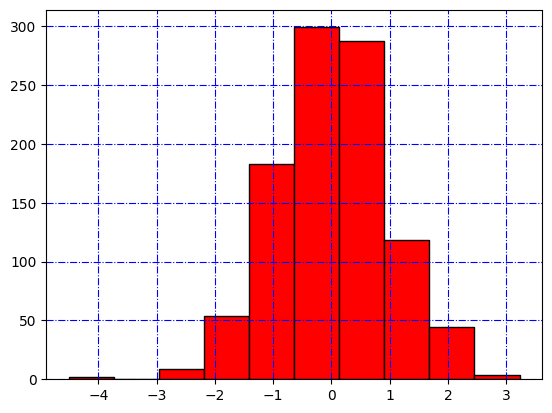

In [1]:
import matplotlib.pyplot as plt
import numpy as np
a=np.random.randn(1000)
plt.hist(a, edgecolor='black', color='r')
plt.grid(color='blue', linestyle='-.')

(array([  8.,  54., 109., 199., 223., 205., 138.,  51.,   9.,   4.]),
 array([-2.67859938, -2.09977112, -1.52094285, -0.94211459, -0.36328632,
         0.21554195,  0.79437021,  1.37319848,  1.95202675,  2.53085501,
         3.10968328]),
 <BarContainer object of 10 artists>)

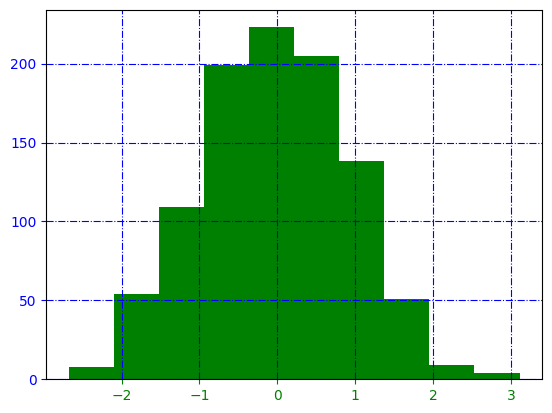

In [2]:
#Changing the Defaults: rcParams

#plt.rcParams / plt.rc

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import cycler
b=np.random.randn(1000)
c= cycler('color',['green','blue','red','white','black']) 
plt.rc('axes', grid=True, prop_cycle=c)
#plt.set_prop_cycle(c)
plt.rc('grid',color='blue', linestyle='-.')
plt.rc('xtick',color='green', direction='out')
plt.rc('ytick',color='blue',direction='out')
plt.rc('lines', linewidth=6)
plt.hist(b)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


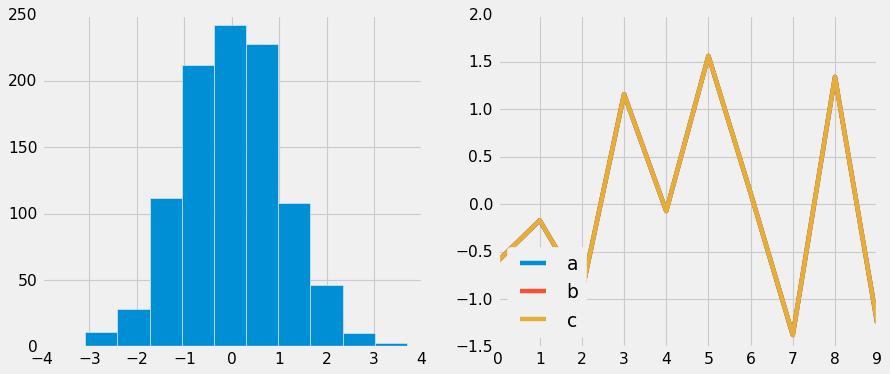

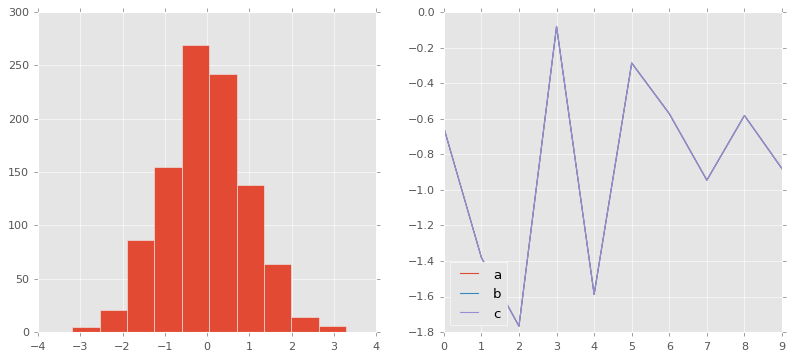

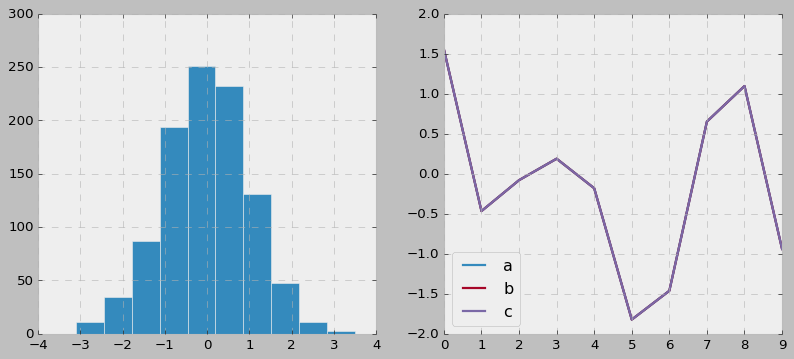

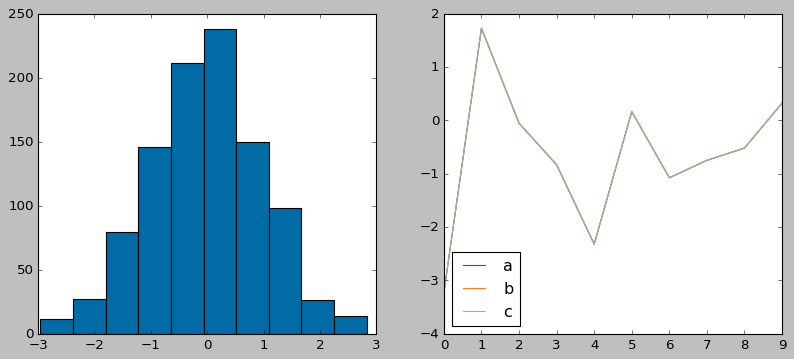

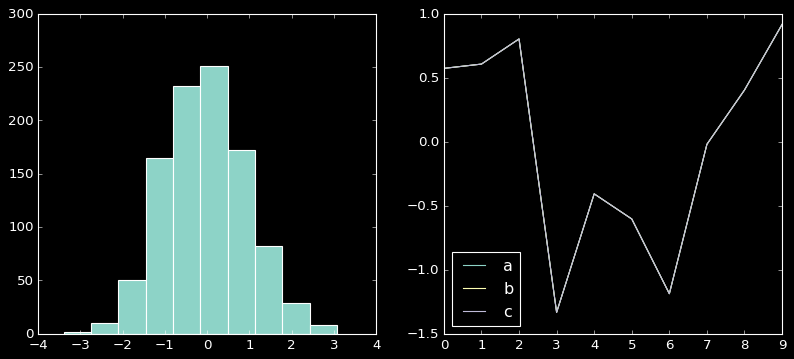

In [4]:
#Stylesheets
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('classic')

def hist_and_lines():
    f,axs=plt.subplots(1,2, figsize=(12,5))
    a=np.random.randn(1000)
    b=np.random.randn(10)
    axs[0].hist(a)
    for i in range(3):
        axs[1].plot(b)
    axs[1].legend(['a','b','c'],loc='lower left')

#FiveThiryEight style
with plt.style.context('fivethirtyeight'):
    hist_and_lines()
    
#ggplot
with plt.style.context('ggplot'):
    hist_and_lines()

#Bayesian Methods for Hackers -> bmh
with plt.style.context('bmh'):
    hist_and_lines()

#tableau-colorblind10
with plt.style.context('tableau-colorblind10'):
    hist_and_lines()
    
#dark_background

with plt.style.context('dark_background'):
    hist_and_lines()

Three-Dimensional Plotting in Matplotlib-> mpl_toolkits , mplot3d
    Three-Dimensional Points and Lines
	Three-Dimensional Contour Plots
	Wireframes and Surface Plots
	Surface Triangulations

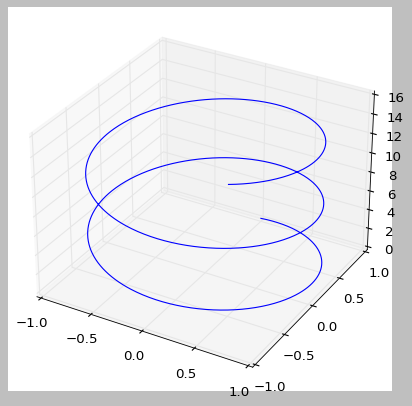

In [8]:
#Three-Dimensional Points and Lines
from mpl_toolkits import mplot3d #2d -> x,y  3d-> x,y,z
import numpy as np
import matplotlib.pyplot as plt
ax=plt.axes(projection='3d') #--> creation of 3d 
zline=np.linspace(0,15,1000)
xline=np.sin(zline)
yline=np.cos(zline)
ax.plot3D(xline, yline , zline) 

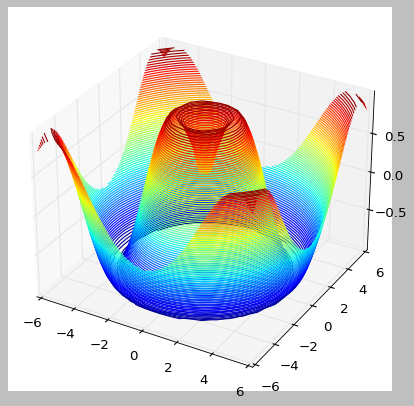

In [12]:
#Three-Dimensional Contour Plots -> ax.contour, ax.contour3D

def f(x,y):
    return np.sin(np.sqrt(x**2+y**2))

a=np.linspace(-6,6,30)
b=np.linspace(-6,6,30)
X,Y =np.meshgrid(a,b)
Z=f(X,Y)

f=plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(X,Y,Z, 90)



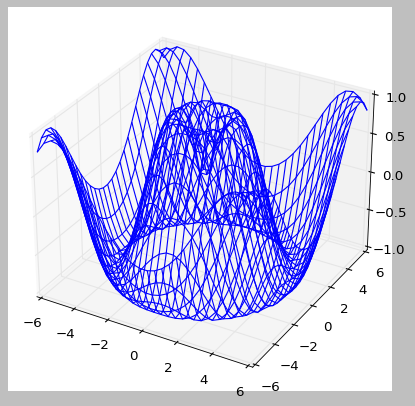

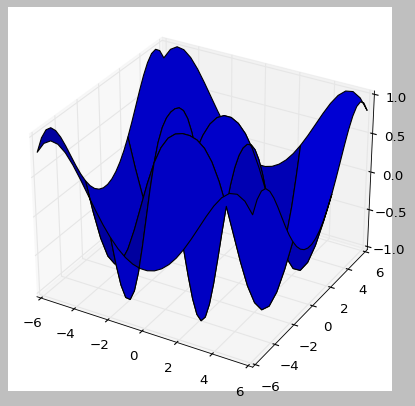

In [14]:
#Wireframes and Surface Plots ->plot_wireframe , plot_surface

f=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z)

f=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,Z)

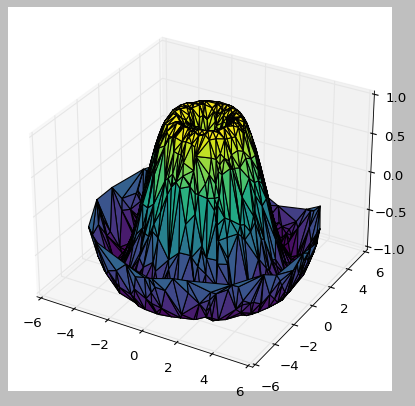

In [17]:
#Surface Triangulations -> plot_trisurf
#plot_trisurf
def f(x,y):
    return np.sin(np.sqrt(x**2+y**2))
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta)) #-> Return the values in array format
y = np.ravel(r * np.cos(theta))
z = f(x, y)
ax=plt.axes(projection='3d')
ax.plot_trisurf(x,y,z, cmap='viridis' )


Geographic Data with Basemap	
    Map Projections
	Drawing a Map Background
	Plotting Data on Maps

In [18]:
pip install basemap

In [19]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Map Projections

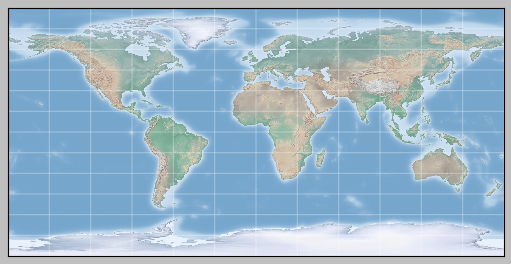

In [26]:
#1.Cylindrical projections ->cyl
from itertools import chain
def draw_map(m, scale=0.2):
    m.shadedrelief(scale=scale)
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')
fig = plt.figure(figsize=(8, 6), edgecolor='w')
#llcrnrlat -> lower left corner , urcrnrlat -> upper right corner
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(4088233.103067454, 2496924.2663351917, 'India')

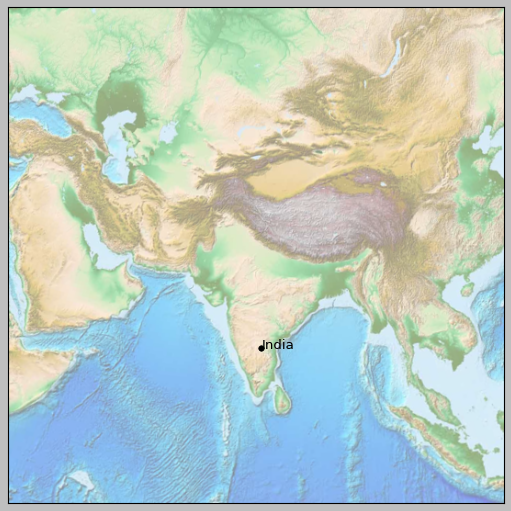

In [37]:
#2.llc projection -> conic

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=28.4, lon_0=77.2,)

m.etopo(scale=0.5, alpha=0.5)
x,y=m(78,15)
plt.plot(x,y,'ok',markersize=5)
plt.text(x,y,'India',fontsize=12)

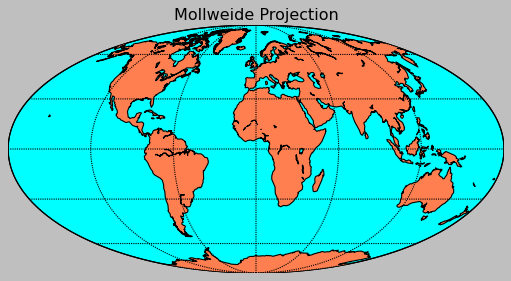

In [38]:
#3.Pseudo-cylindrical projections (mollweide- moll, sinusoidal, robinson)
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
m = Basemap(projection='moll',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Mollweide Projection")
plt.show()

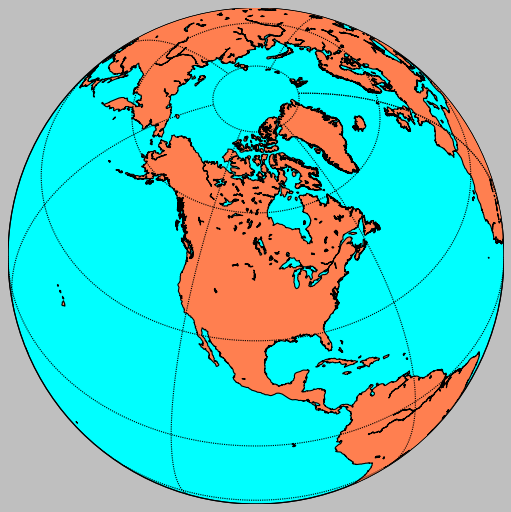

In [24]:
#4.orthogonal projection
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution='l', lat_0=50, lon_0=-100)
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary(fill_color='aqua')
plt.show()

Drawing a Map Background

1.Physical boundaries and bodies of water 
drawcoastlines(): Draw continental coast lines 
drawlsmask(): Draw a mask between the land and sea, for use with projecting images on one or the other 
drawmapboundary(): Draw the map boundary, including the fill color for oceans. drawrivers(): Draw rivers on the map 
fillcontinents(): Fill the continents with a given color; optionally fill lakes with another color

2.Political boundaries 
drawcountries(): Draw country boundaries 
drawstates(): Draw US state boundaries 
drawcounties(): Draw US county boundaries 

3.Map features 
drawgreatcircle(): Draw a great circle between two points 
drawparallels(): Draw lines of constant latitude 
drawmeridians(): Draw lines of constant longitude 
drawmapscale(): Draw a linear scale on the map 

4.Whole-globe images 
bluemarble(): Project NASA's blue marble image onto the map 
shadedrelief(): Project a shaded relief image onto the map 
etopo(): Draw an etopo relief image onto the map 
warpimage(): Project a user-provided image onto the map


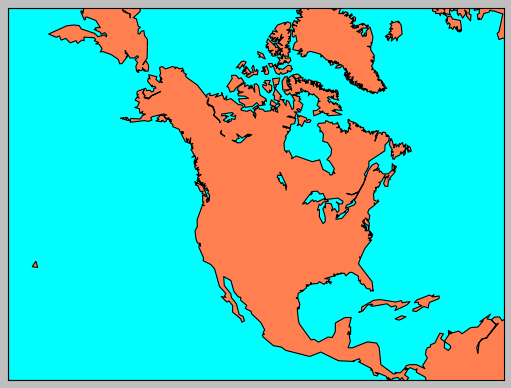

In [40]:
#coast lines, fillig ocean and land areas
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
m=Basemap(height=9000000,width=12000000,projection='lcc',resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')
plt.show()

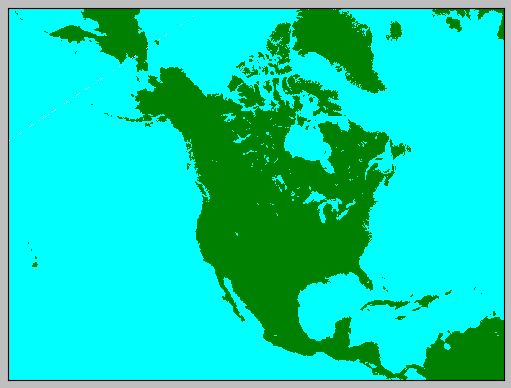

In [41]:
#drawlsmask

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
m=Basemap(height=9000000,width=12000000,projection='lcc',resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.drawlsmask(land_color='green',ocean_color='aqua',lakes=True)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


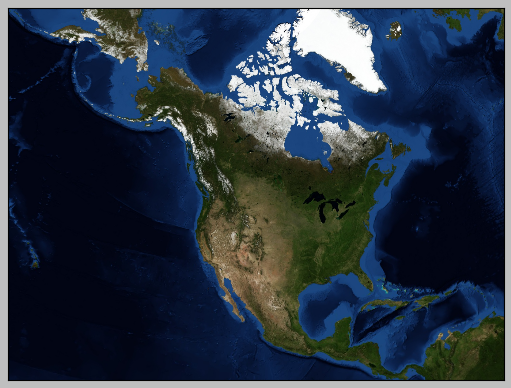

In [42]:
#bLUEmarble

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
m=Basemap(height=9000000,width=12000000,projection='lcc',resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
plt.show()

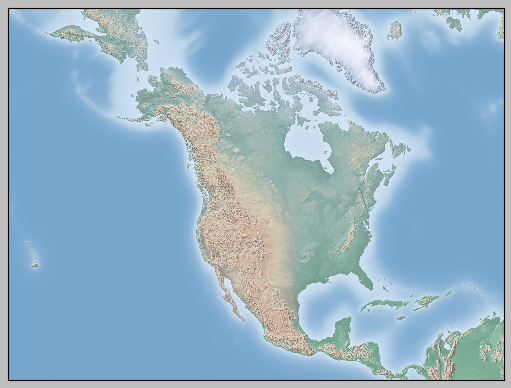

In [43]:
#Shaded relief

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
m=Basemap(height=9000000,width=12000000,projection='lcc',resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.shadedrelief()
plt.show()